In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

Để lấy hoặc tải tập dữ liệu vào sổ ghi chép, tất cả những gì tôi làm chỉ là một bước nhỏ. Trong Google Colab ở phía bên trái của sổ ghi chép, bạn sẽ tìm thấy dấu > (ký hiệu lớn hơn). Khi nhấp vào đó, bạn sẽ thấy một tab có ba tùy chọn, bạn chỉ cần chọn Tệp. Sau đó, bạn có thể dễ dàng tải tệp của mình lên với sự trợ giúp của tùy chọn Tải lên. Không cần mount vào google drive hay sử dụng bất kỳ thư viện cụ thể nào chỉ cần tải tập dữ liệu lên là xong công việc của bạn. Một điều cần nhớ ở bước này là các tệp đã tải lên sẽ bị xóa khi thời gian chạy này được tái sử dụng. Đây là cách tôi lấy dữ liệu vào sổ ghi chép.

## Đang tải dữ liệu vào khung dữ liệu

Tải dữ liệu vào khung dữ liệu gấu trúc chắc chắn là một trong những bước quan trọng nhất trong EDA, vì chúng ta có thể thấy rằng giá trị từ tập dữ liệu được phân tách bằng dấu phẩy. Vì vậy, tất cả những gì chúng ta phải làm là chỉ đọc CSV vào khung dữ liệu và khung dữ liệu gấu trúc sẽ thực hiện công việc cho chúng ta.

In [ ]:
df = pd.read_csv("../jupyter/data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## Kiểm tra các loại dữ liệu


Ở đây, chúng tôi kiểm tra các kiểu dữ liệu vì đôi khi MSRP hoặc giá ô tô sẽ được lưu trữ dưới dạng một chuỗi, nếu trong trường hợp đó, chúng tôi chỉ phải chuyển đổi chuỗi đó thành dữ liệu số nguyên thì chúng tôi có thể vẽ dữ liệu qua biểu đồ. Ở đây, trong trường hợp này, dữ liệu đã ở định dạng số nguyên nên không có gì phải lo lắng.

In [1]:
df.dtypes

NameError: name 'df' is not defined

## Loại bỏ các cột không liên quan

Bước này chắc chắn cần thiết trong mọi EDA vì đôi khi sẽ có nhiều cột mà chúng tôi không bao giờ sử dụng trong những trường hợp như vậy, việc bỏ đi là giải pháp duy nhất. Trong trường hợp này, các cột như Loại nhiên liệu động cơ, Danh mục thị trường, Kiểu xe, Mức độ phổ biến, Số cửa, Kích thước xe không có ý nghĩa gì đối với tôi nên tôi chỉ bỏ qua trường hợp này.

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Đổi tên các cột

Trong trường hợp này, hầu hết các tên cột đều rất khó đọc nên tôi chỉ điều chỉnh tên cột của chúng. Đây là một cách tiếp cận tốt, nó cải thiện khả năng đọc của tập dữ liệu.

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Bỏ các hàng trùng lặp

Đây thường là một việc hữu ích vì một tập dữ liệu khổng lồ như trong trường hợp này chứa hơn 10.000 hàng thường có một số dữ liệu trùng lặp có thể gây phiền toái, vì vậy ở đây tôi xóa tất cả giá trị trùng lặp khỏi tập dữ liệu. Ví dụ: trước khi xóa, tôi có 11914 hàng dữ liệu nhưng sau khi xóa dữ liệu trùng lặp 10925, nghĩa là tôi có 989 dữ liệu trùng lặp.

In [ ]:
df.shape

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [ ]:
df.count()      # Used to count the number of rows

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

## Bỏ các giá trị bị thiếu hoặc null.

Điều này gần như tương tự với bước trước nhưng ở đây tất cả các giá trị bị thiếu đều được phát hiện và bị loại bỏ sau đó. Bây giờ, đây không phải là cách tiếp cận tốt vì nhiều người chỉ thay thế các giá trị còn thiếu bằng giá trị trung bình hoặc trung bình của cột đó, nhưng trong trường hợp này, tôi chỉ bỏ đi các giá trị còn thiếu đó. Điều này là do có gần 100 giá trị bị thiếu so với 10.000 giá trị, đây là một con số nhỏ và không đáng kể nên tôi chỉ bỏ những giá trị đó.

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [ ]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## Phát hiện ngoại lệ

<Axes: xlabel='Price'>

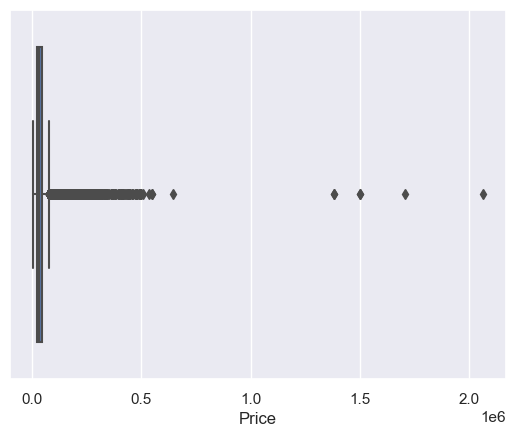

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

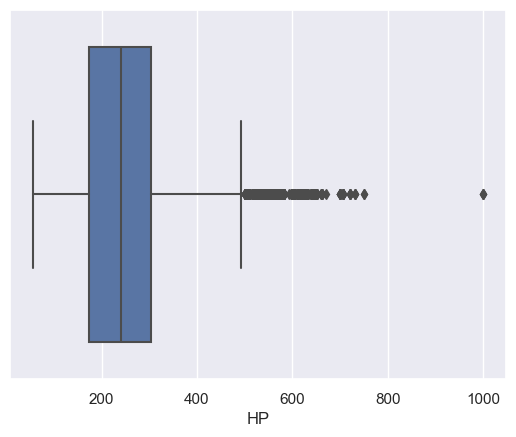

In [ ]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

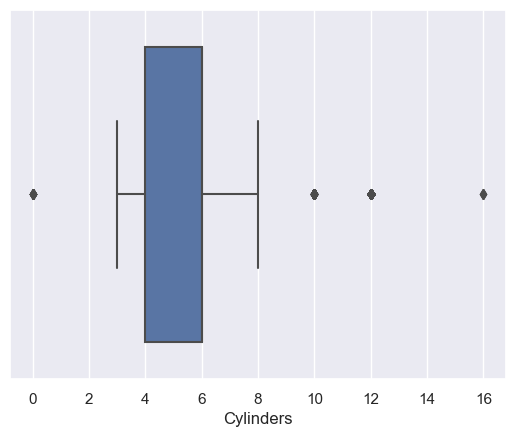

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_15548\4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9191, 10)

Như đã thấy ở trên, có khoảng 1600 hàng là ngoại lệ. Nhưng bạn không thể loại bỏ hoàn toàn các ngoại lệ vì ngay cả sau khi bạn sử dụng kỹ thuật trên, có thể có 1–2 ngoại lệ không bị loại bỏ nhưng điều đó không sao vì có hơn 100 ngoại lệ. Có còn hơn không.

## Vẽ các đặc điểm khác nhau với nhau (phân tán), theo tần số (biểu đồ)

Biểu đồ đề cập đến tần suất xuất hiện của các biến trong một khoảng. Trong trường hợp này, chủ yếu có 10 loại công ty sản xuất ô tô khác nhau, nhưng điều quan trọng là phải biết ai có số lượng ô tô nhiều nhất. Thực hiện biểu đồ này là một trong những giải pháp tầm thường cho phép chúng ta biết tổng số ô tô được sản xuất bởi một công ty khác.

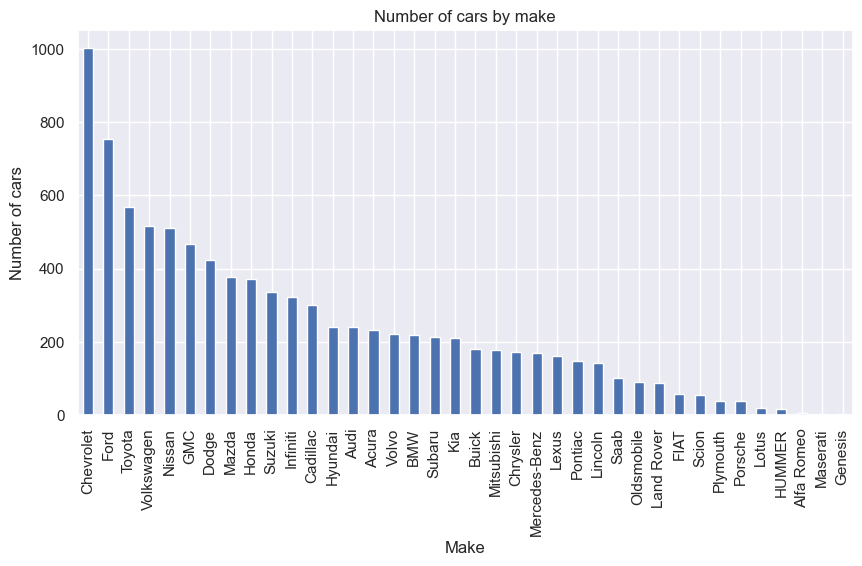

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

Bản đồ nhiệt là loại biểu đồ cần thiết khi chúng ta cần tìm các biến phụ thuộc. Một trong những cách tốt nhất để tìm ra mối quan hệ giữa các tính năng có thể được thực hiện bằng bản đồ nhiệt. Trong bản đồ nhiệt bên dưới, chúng tôi biết rằng tính năng giá cả phụ thuộc chủ yếu vào Kích thước Động cơ, Mã lực và Xi lanh.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


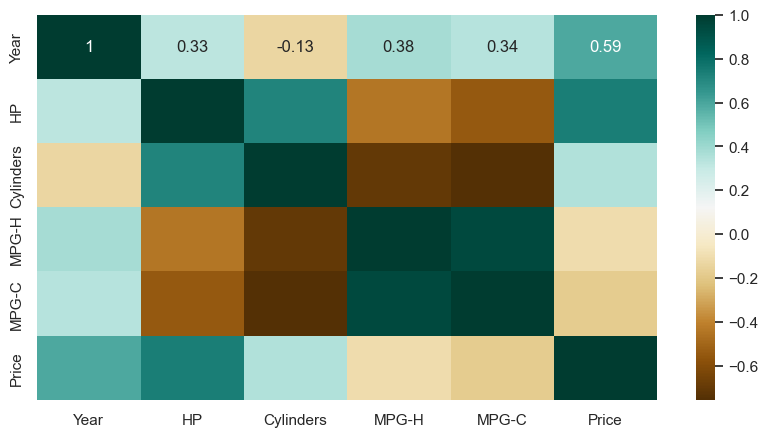

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Chúng ta thường sử dụng biểu đồ phân tán để tìm mối tương quan giữa hai biến. Ở đây, các biểu đồ phân tán được vẽ giữa Mã lực và Giá cả và chúng ta có thể thấy biểu đồ bên dưới. Với biểu đồ dưới đây, chúng ta có thể dễ dàng vẽ đường xu hướng. Những tính năng này cung cấp sự phân tán điểm tốt.

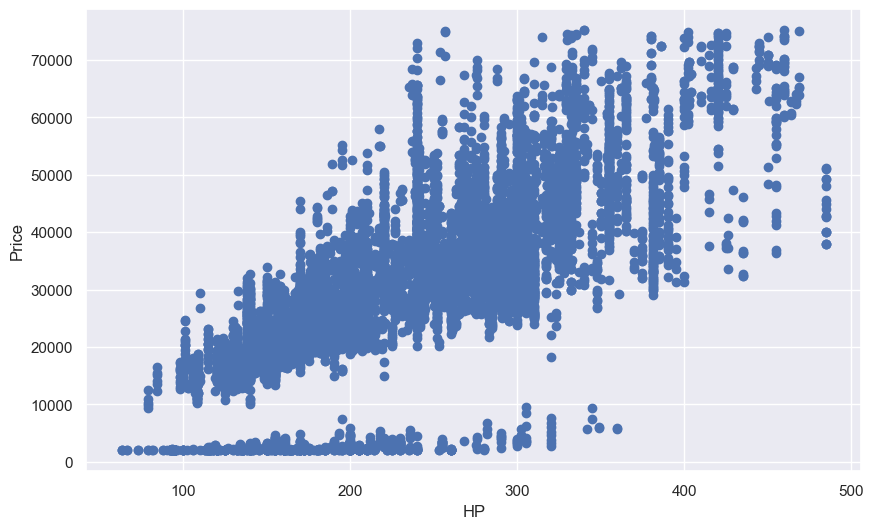

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Do đó, trên đây là một số bước liên quan đến phân tích dữ liệu Khám phá, đây là một số bước chung mà bạn phải tuân theo để thực hiện EDA. Vẫn còn nhiều điều nữa nhưng hiện tại, đây là quá đủ ý tưởng về cách thực hiện một EDA tốt với bất kỳ tập dữ liệu nào. Hãy theo dõi để biết thêm thông tin cập nhật.